## Simple Scenario Example

First, install UXsim using pip and import the required modules.

In [ ]:
!pip install uxsim

In [1]:
from uxsim import *
import pandas as pd

### Scenario Definition

First, we will define the main simulation `W`.
The unit of time is s (seconds) and the unit of length is m.

In [2]:
W = World(
    name="simple_demo",    # Scenario name. Can be blank. Used as the folder name for saving results.
    deltan=5,   # Simulation aggregation unit Δn. Defines how many vehicles are grouped together (i.e., platoon size) for computation. Computation cost is generally inversely proportional to deltan^2.
    tmax=1200,  # Total simulation time (s)
    print_mode=1, save_mode=1, show_mode=1,    # Various options. print_mode determines whether to print information. Usually set to 1, but recommended 0 when running multiple simulations automatically. save_mode determines if visualization results are saved. show_mode determines if visualization results are displayed. It's good to set show_mode=1 on Jupyter Notebook, otherwise recommended 0.
    random_seed=0    # Set the random seed. Specify if you want repeatable experiments. If not, set to None. On Jupyter Notebook, randomness might not always be consistent (requires a fix).
)

The simulation scenario (network structure and demand) is defined.
First, nodes are added, then links are defined to connect the nodes, and finally the traffic demand between the nodes is specified.
In this case, we define a simple Y-shaped merging network.

In [3]:
W.addNode("orig1", 0, 0) #Create a node. Parameters: node name, visualization x-coordinate, visualization y-coordinate
W.addNode("orig2", 0, 2)
W.addNode("merge", 1, 1)
W.addNode("dest", 2, 1)

W.addLink("link1", "orig1", "merge", length=1000, free_flow_speed=20, jam_density=0.2, merge_priority=0.5) # Create a link. Parameters: link name, start node, end node, length, free_flow_speed, jam_density, merge_priority during merging
W.addLink("link2", "orig2", "merge", length=1000, free_flow_speed=20, jam_density=0.2, merge_priority=2)
W.addLink("link3", "merge", "dest", length=1000, free_flow_speed=20, jam_density=0.2)

W.adddemand("orig1", "dest", 0, 1000, 0.4) # Create OD traffic demand. Parameters: origin node, destination node, start time, end time, demand flow rate
W.adddemand("orig2", "dest", 500, 1000, 0.6)

The network shape is as follows.

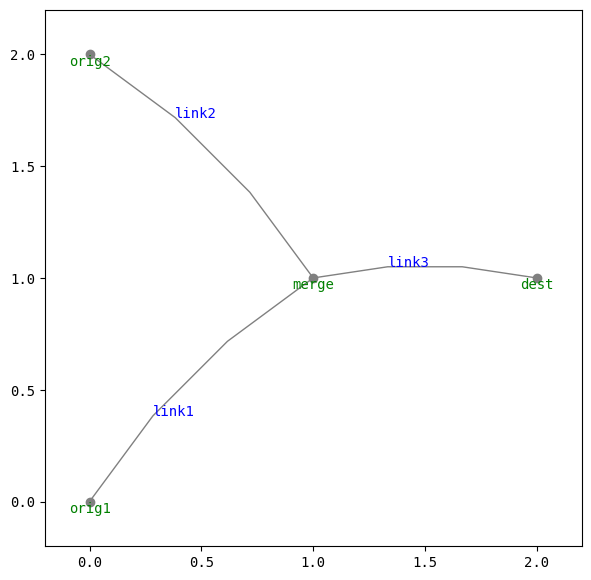

In [4]:
W.show_network()

### Simulation Execution

After defining the scenario, you can execute the simulation with `W.exec_simulation()`. This time, the simulation is run to the end. The simulation time, the number of vehicles in the network at that time, their average speed, and the computation time are displayed.

In [5]:
W.exec_simulation()

simulation setting:
 scenario name: simple_demo
 simulation duration:	 1200 s
 number of vehicles:	 700 veh
 total road length:	 3000 m
 time discret. width:	 5 s
 platoon size:		 5 veh
 number of timesteps:	 240
 number of platoons:	 140
 number of links:	 3
 number of nodes:	 4
 setup time:		 4.51 s
simulating...
      time| # of vehicles| ave speed| computation time
       0 s|        0 vehs|   0.0 m/s|     0.00 s
     600 s|      100 vehs|  17.5 m/s|     0.03 s
    1195 s|       25 vehs|  20.0 m/s|     0.05 s
 simulation finished


1

### Results

The `W.analyzer` class is responsible for analyzing the results.

A summary of the results can be printed below. Delay ratio is the ratio of delay time to total trip time, with a value close to zero indicating smooth traffic (when the shortest route can be traveled without congestion) and a larger value indicating congestion (when the shortest route is bypassed or congested).

In [6]:
W.analyzer.print_simple_stats()

results:
 average speed:	 13.8 m/s
 number of completed trips:	 675 / 700
 average travel time of trips:	 142.7 s
 average delay of trips:	 42.7 s
 delay ratio:			 0.299


### Visualization of Results

#### Network-level

In order to see overall results, you can generate a gif animation of the traffic situation of the entire network.
By default, you can visualize the traffic situation per link, the traffic situation per section within a link (may not be very clear depending on the network geometry).
The thicker the width of the link, the greater the number and density of vehicles, and the darker the color, the lower the speed.
Note that the animation generation speed for large scenarios can be very slow.

 generating animation...


  0%|          | 0/8 [00:00<?, ?it/s]

 generating animation...


  0%|          | 0/10 [00:00<?, ?it/s]

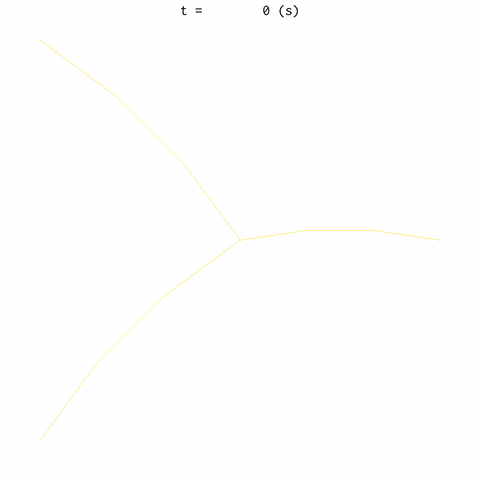

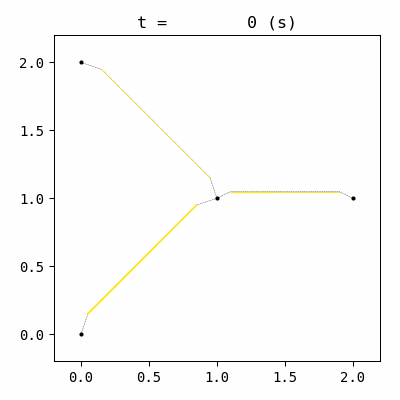

In [8]:
W.analyzer.network_anim(animation_speed_inverse=15, timestep_skip=30, detailed=0, network_font_size=0, figsize=(4,4))
W.analyzer.network_anim(detailed=1, network_font_size=0, figsize=(4,4))

from IPython.display import display, Image
with open("outsimple_demo/anim_network0.gif", "rb") as f:
    display(Image(data=f.read(), format='png'))
with open("outsimple_demo/anim_network1.gif", "rb") as f:
    display(Image(data=f.read(), format='png'))

You can also see the trajectories of some vehicles traveling through the network. This is quite slow.

 generating animation...


  0%|          | 0/120 [00:00<?, ?it/s]

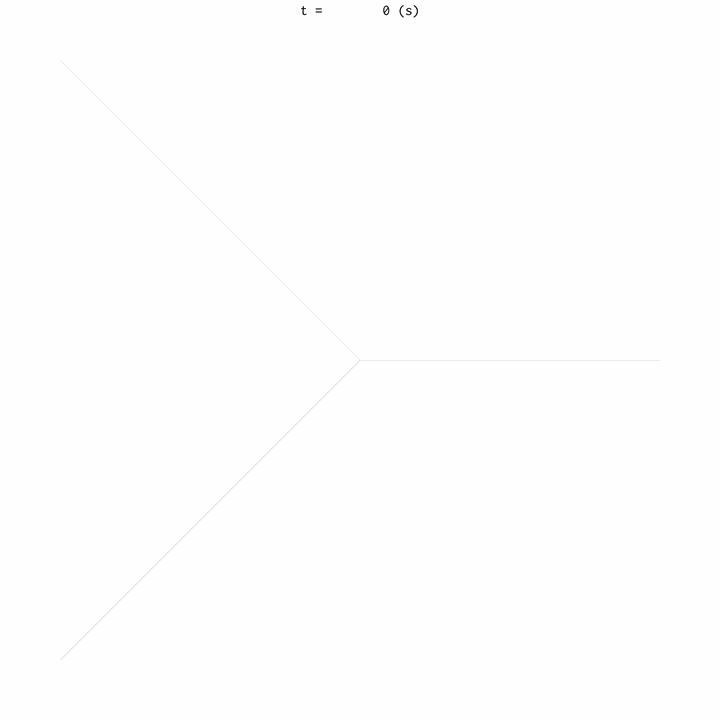

In [9]:
W.analyzer.network_fancy(animation_speed_inverse=15, sample_ratio=0.3, interval=3, trace_length=5)
with open("outsimple_demo/anim_network_fancy.gif", "rb") as f:
    display(Image(data=f.read(), format='png'))


If you don't need animation, you can quickly visualize snapshots of network traffic.

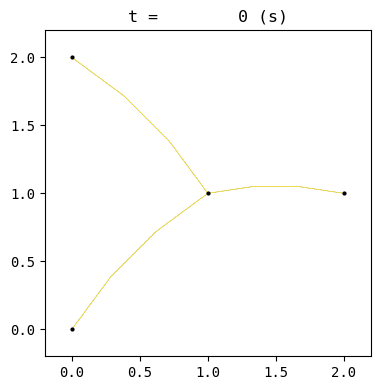

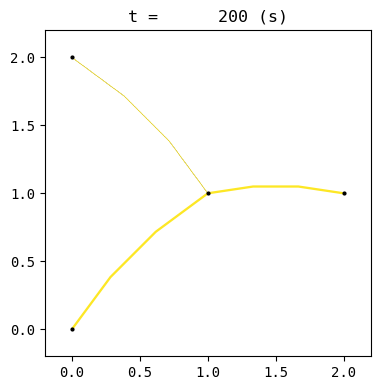

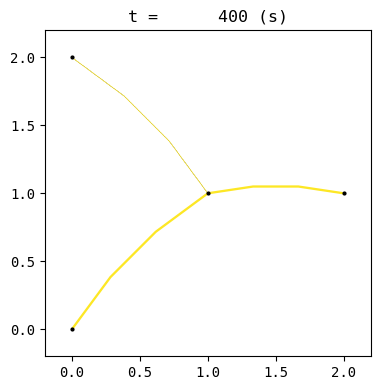

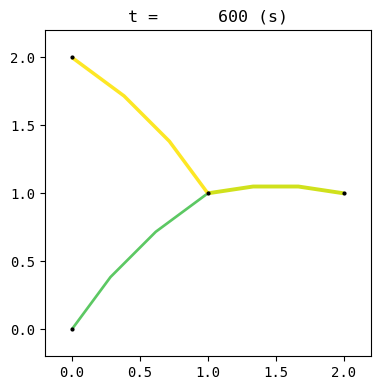

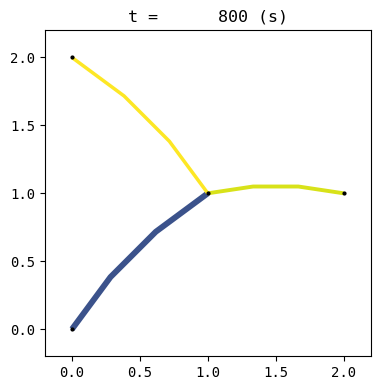

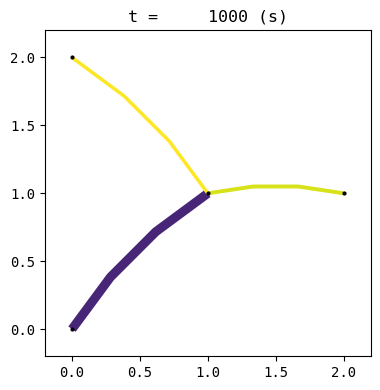

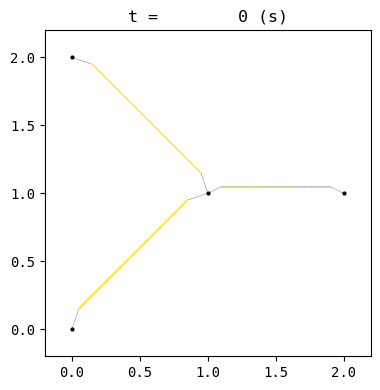

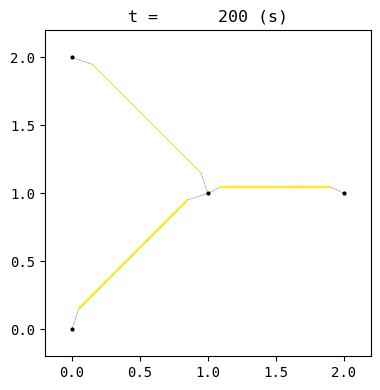

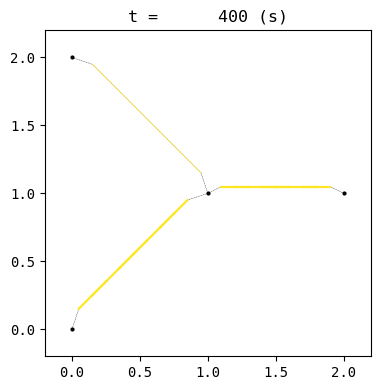

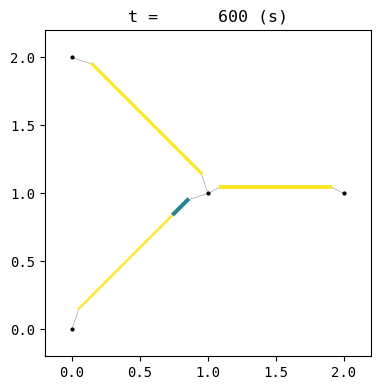

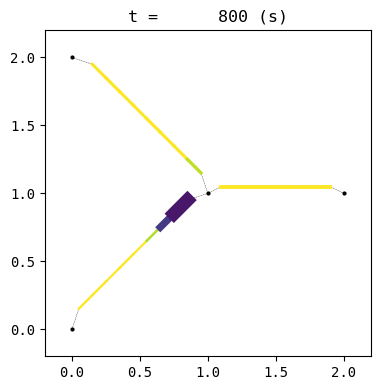

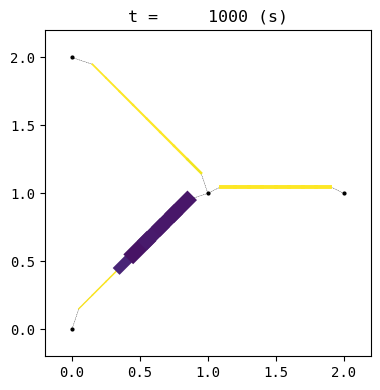

In [10]:
for t in list(range(0,W.TMAX,int(W.TMAX/6))):
    W.analyzer.network(t, detailed=0, network_font_size=0, figsize=(4,4))
for t in list(range(0,W.TMAX,int(W.TMAX/6))):
    W.analyzer.network(t, detailed=1, network_font_size=0, figsize=(4,4))

#### Link-level
In order to investigate detailed traffic dynamics, time-space diagrams (which is a standard visualization method in traffic flow theory) of density and trajectories for each link can be plotted as follows.
Ones for consecutive links can also be plotted.

 drawing traffic states...


  0%|          | 0/3 [00:00<?, ?it/s]

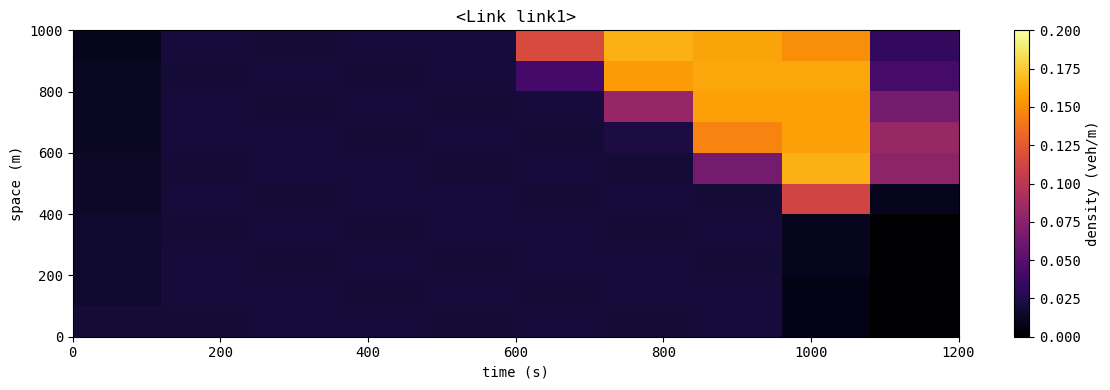

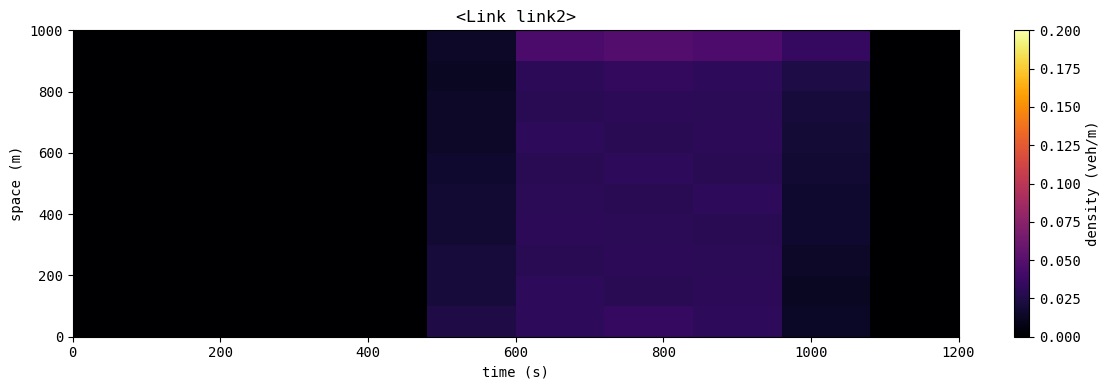

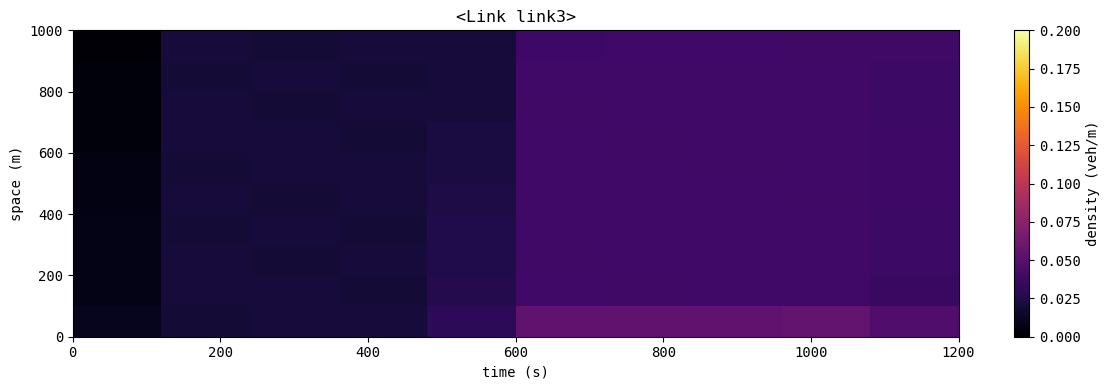

 drawing trajectories...


  0%|          | 0/3 [00:00<?, ?it/s]

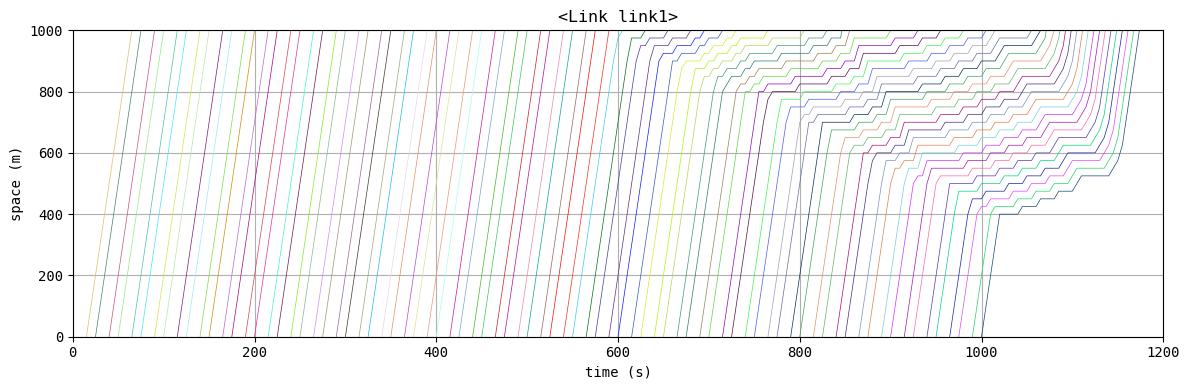

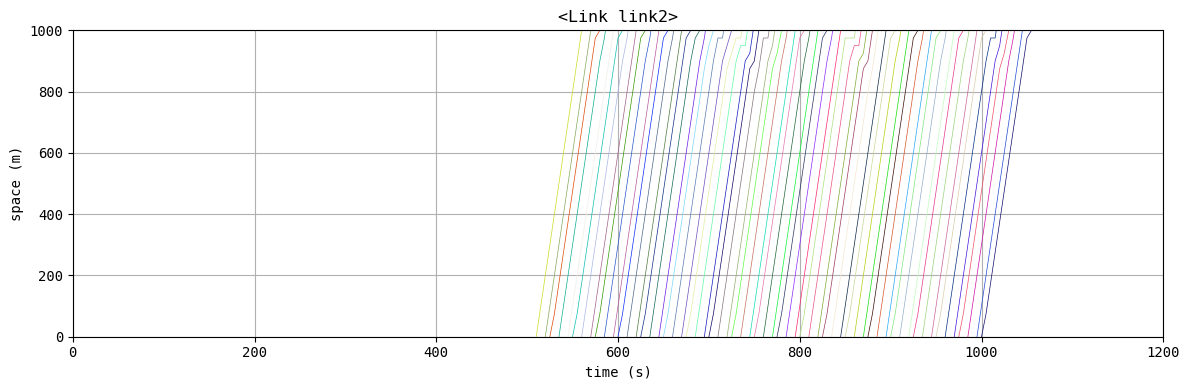

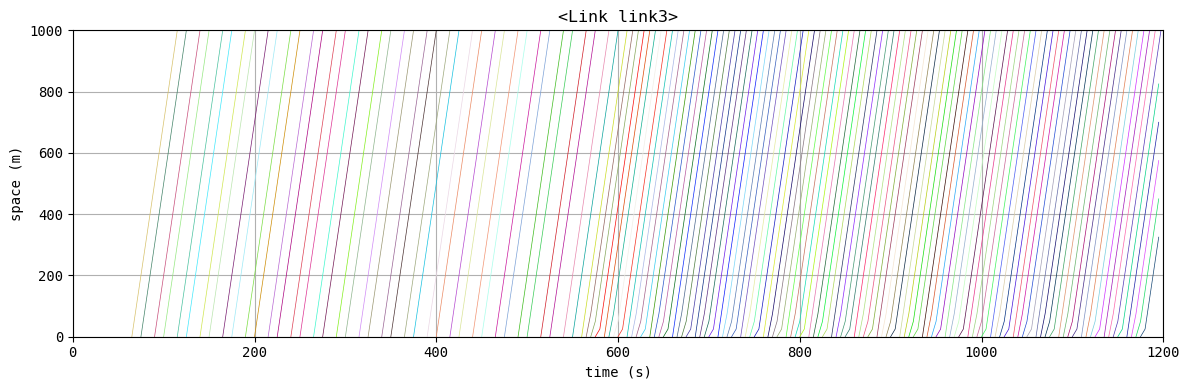

 drawing trajectories in consecutive links...


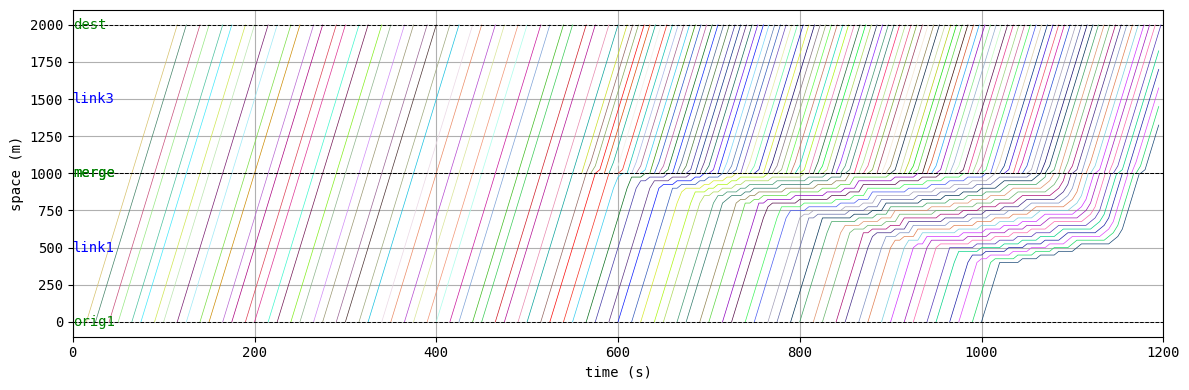

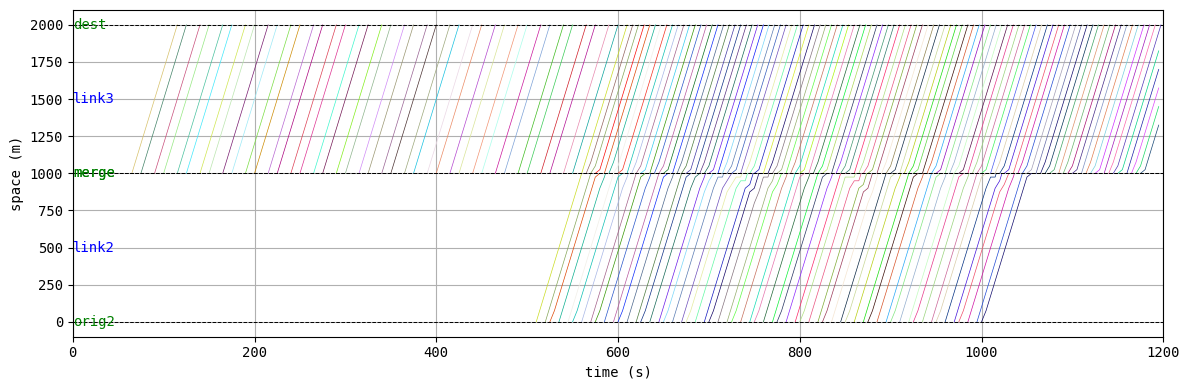

In [11]:
W.analyzer.time_space_diagram_density()
W.analyzer.time_space_diagram_traj()
W.analyzer.time_space_diagram_traj_links([["link1", "link3"], ["link2", "link3"]])

#### Area-level

The macroscopic fundamental diagram can also be generated

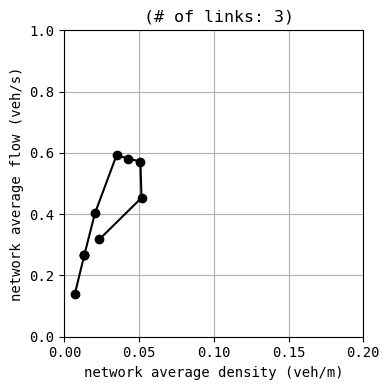

In [12]:
W.analyzer.macroscopic_fundamental_diagram()

### Numerical analysis

If you need to compute numbers, you can output the simulation results as pandas.Dataframe format.

In [13]:
#overall
df = W.analyzer.basic_to_pandas()
display(df)

#OD-specific traffic situation
df = W.analyzer.od_to_pandas()
display(df)

#MFD
df = W.analyzer.mfd_to_pandas()
display(df)

#link-level
df = W.analyzer.link_to_pandas()
display(df)

#within link
df = W.analyzer.link_traffic_state_to_pandas()
display(df)

#vehicle-level
df = W.analyzer.vehicles_to_pandas()
display(df)

,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,700,675,96325.0,142.703704,28825.0,42.703704


,orig,dest,total_trips,completed_trips,free_travel_time,average_travel_time,stddiv_travel_time
0,orig1,dest,400,375,100.0,168.466667,88.990536
1,orig2,dest,300,300,100.0,110.500000,4.444097


,t,network_k,network_q
0,0,0.006944,0.138889


,link,traffic_volume,vehicles_remain,free_travel_time,average_travel_time,stddiv_travel_time
0,link1,400,0,50.0,128.625000,81.718425
1,link2,300,0,50.0,55.583333,6.129958
2,link3,675,25,50.0,52.166667,2.477678


,link,t,x,delta_t,delta_x,q,k,v
0,link1,0,0.0,120,100.0,0.375000,0.018750,20.0
1,link1,0,100.0,120,100.0,0.333333,0.016667,20.0
2,link1,0,200.0,120,100.0,0.333333,0.016667,20.0
3,link1,0,300.0,120,100.0,0.333333,0.016667,20.0
4,link1,0,400.0,120,100.0,0.291667,0.014583,20.0
...,...,...,...,...,...,...,...,...
295,link3,1080,500.0,120,100.0,0.770833,0.038542,20.0
296,link3,1080,600.0,120,100.0,0.770833,0.038542,20.0
297,link3,1080,700.0,120,100.0,0.760417,0.038021,20.0
298,link3,1080,800.0,120,100.0,0.760417,0.038021,20.0


,name,dn,orig,dest,t,link,x,s,v
0,0,5,orig1,dest,15,link1,0.0,-1.0,20.0
1,0,5,orig1,dest,20,link1,100.0,-1.0,20.0
2,0,5,orig1,dest,25,link1,200.0,-1.0,20.0
3,0,5,orig1,dest,30,link1,300.0,-1.0,20.0
4,0,5,orig1,dest,35,link1,400.0,-1.0,20.0
...,...,...,...,...,...,...,...,...,...
4207,139,5,orig2,dest,1100,link3,675.0,225.0,20.0
4208,139,5,orig2,dest,1105,link3,775.0,-1.0,20.0
4209,139,5,orig2,dest,1110,link3,875.0,-1.0,20.0
4210,139,5,orig2,dest,1115,link3,975.0,-1.0,20.0


Or save as CSV files.

In [14]:
W.analyzer.output_data()